# Sentence embeddings

In this notebook we will be working with the `sentence-transformers` library. It hides away a lot of complexity and makes it easy to create embeddings from sentences or even paragraphs or small documents!

Below is a snippet from the [library's documentation frontpage](https://sbert.net/) which illustrates how to use it.

In [1]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)
# tensor([[1.0000, 0.6660, 0.1046],
#         [0.6660, 1.0000, 0.1411],
#         [0.1046, 0.1411, 1.0000]])

(3, 384)
tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


This function below (adapted from [here](https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder)) lets you plot similarity in a heatmap.

In [2]:
import seaborn as sns

def plot_similarity(input_sentences: list[str], rotation: int = 90):
    embeddings = model.encode(input_sentences)
    similarities = model.similarity(embeddings, embeddings)
    print(similarities)
    sns.set_theme(font_scale=1.2)
    g = sns.heatmap(
        similarities,
        xticklabels=input_sentences,
        yticklabels=input_sentences,
        vmin=similarities.min(),
        vmax=similarities.max())
    g.set_xticklabels(input_sentences, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


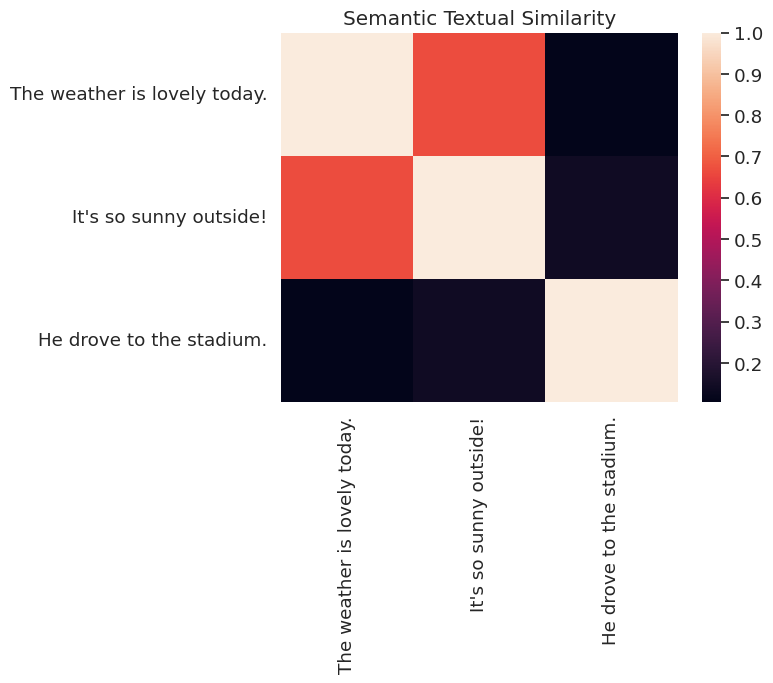

In [3]:
plot_similarity(sentences)

So, the above is the general idea and the few pieces of code you need to test out things. Neat, right?

The idea of **embedding** a piece of text is extremely powerful, and with the examples below I hope it shows how this technique can be foundational for all sorts of problems and tasks.

That is, we will not actually be doing classification or topic clustering with the embeddings in this notebook, but it should give an idea of how the sentence transformer can "grasp" the meaning of a sentence and encode it in a vector.

## Contextual embeddings and disambiguation

As a first example, let us try to see how the context of otherwise identical strings can help disambiguate the meaning.

tensor([[1.0000, 0.4596, 0.1558, 0.2041],
        [0.4596, 1.0000, 0.0560, 0.0466],
        [0.1558, 0.0560, 1.0000, 0.5289],
        [0.2041, 0.0466, 0.5289, 1.0000]])


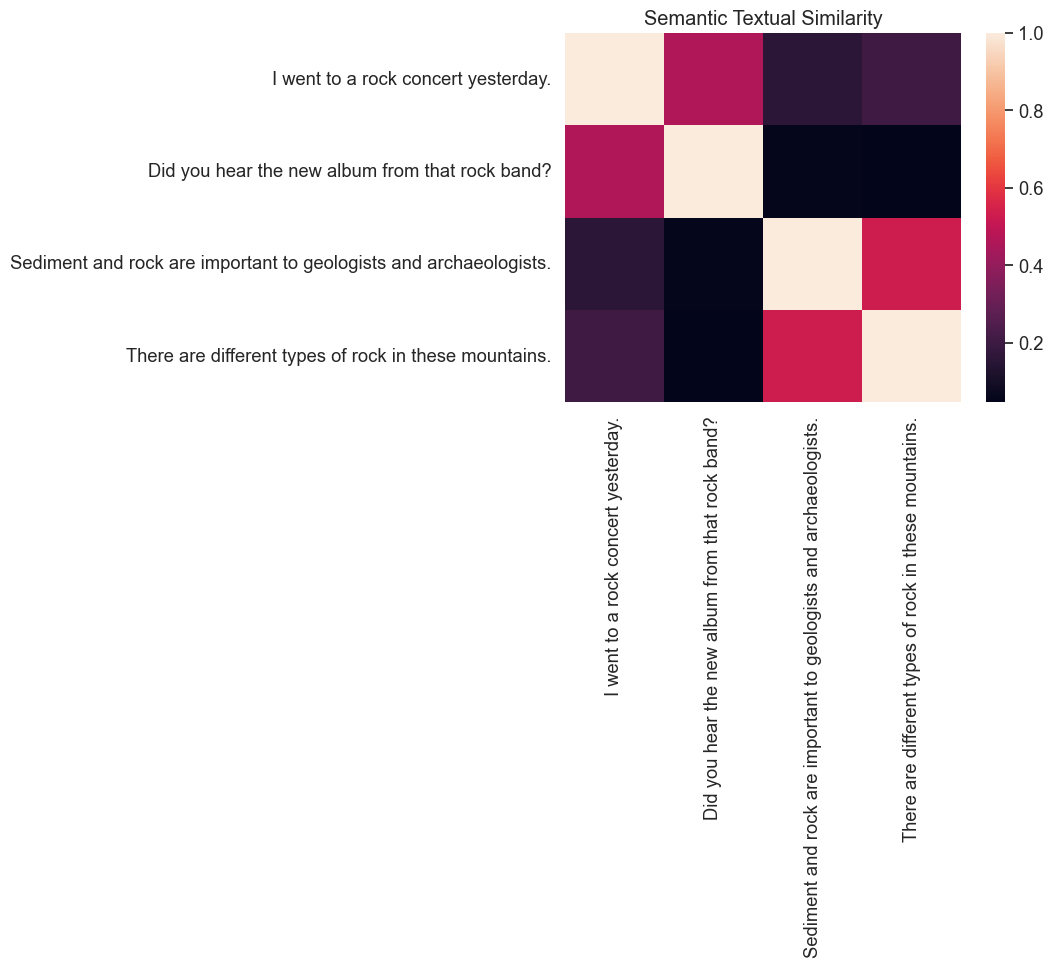

In [64]:
rock_sentences = [
    "I went to a rock concert yesterday.",
    "Did you hear the new album from that rock band?",
    "Sediment and rock are important to geologists and archaeologists.",
    "There are different types of rock in these mountains."
]

plot_similarity(rock_sentences)

Try out with other ambiguous words. How much context is needed to create a clear picture?

## Classification

We love classification! A good place to start to get the idea is sentiment analysis. Let's try it below.

tensor([[1.0000, 0.6578, 0.2156, 0.1219],
        [0.6578, 1.0000, 0.3003, 0.1437],
        [0.2156, 0.3003, 1.0000, 0.3644],
        [0.1219, 0.1437, 0.3644, 1.0000]])


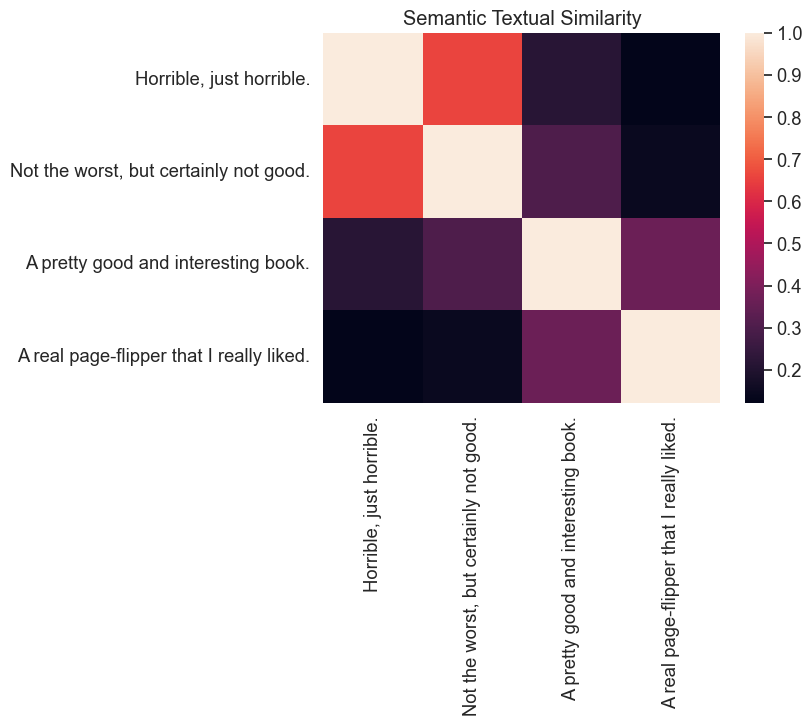

In [68]:
reviews = [
    "Horrible, just horrible.",
    "Not the worst, but certainly not good.",
    "A pretty good and interesting book.",
    "A real page-flipper that I really liked."
]

plot_similarity(reviews)

What else could we classify?

## Topic analysis

A topic is, roughly put, what a given text is _about_. Two texts that are about the same, similar or related topics are expected to be closer in semantic similarity.

tensor([[ 1.0000,  0.1947,  0.0055, -0.0197, -0.0091,  0.1020],
        [ 0.1947,  1.0000, -0.0030,  0.0568,  0.0935,  0.0671],
        [ 0.0055, -0.0030,  1.0000,  0.2829,  0.1603,  0.0896],
        [-0.0197,  0.0568,  0.2829,  1.0000,  0.0588, -0.0960],
        [-0.0091,  0.0935,  0.1603,  0.0588,  1.0000,  0.2341],
        [ 0.1020,  0.0671,  0.0896, -0.0960,  0.2341,  1.0000]])


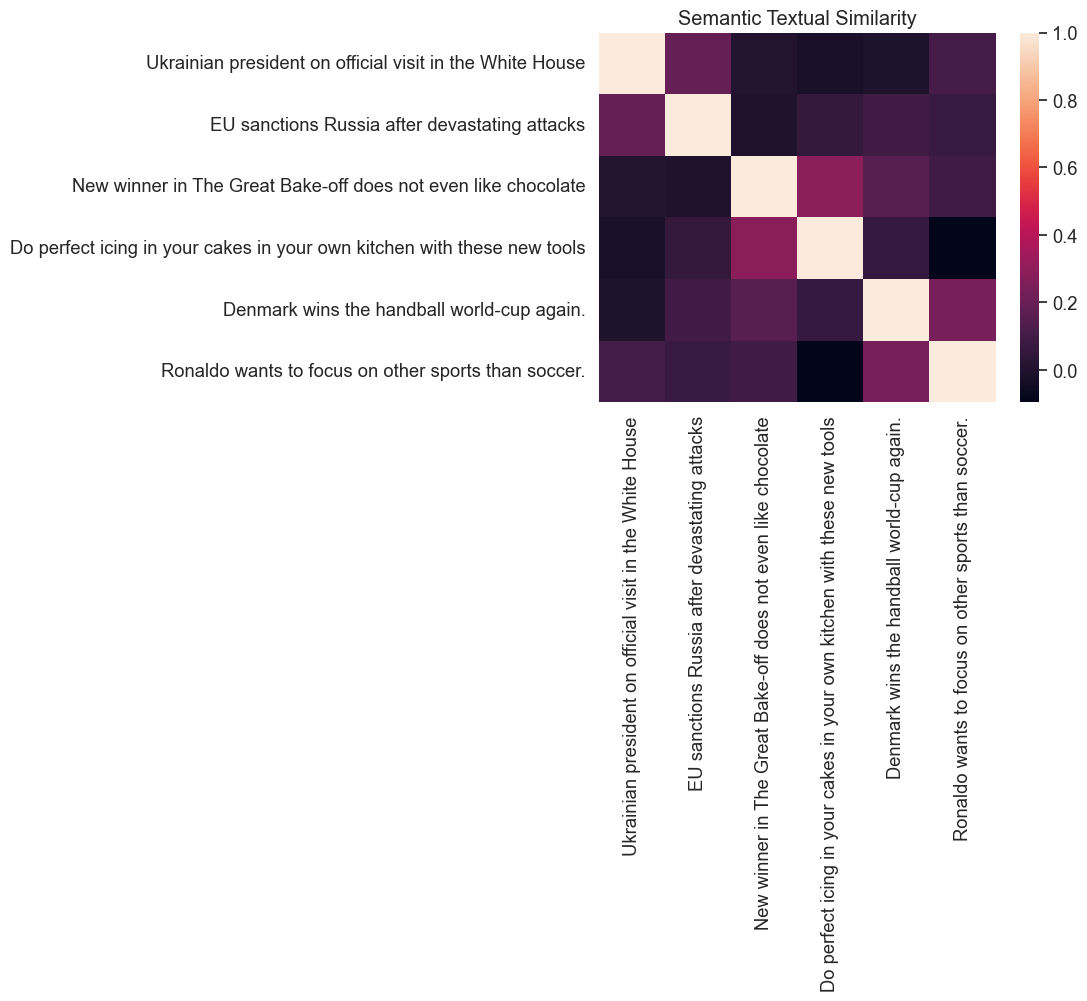

In [67]:
headlines = [
    "Ukrainian president on official visit in the White House",
    "EU sanctions Russia after devastating attacks",
    "New winner in The Great Bake-off does not even like chocolate",
    "Do perfect icing in your cakes in your own kitchen with these new tools",
    "Denmark wins the handball world-cup again.",
    "Ronaldo wants to focus on other sports than soccer."
]

plot_similarity(headlines)

Could you imagine something like topic analysis being relevant to studies in your own field?

Can you think of other uses for sentence embeddings? Be creative and test out ideas. Have a look at https://sbert.net/ for other models as well; some create better embeddings while others are faster. It's a tradeoff!